# Kelompok 1 Data Mining SD-A2
#### **Anggota**:
#### - Najma Attaqiya Alya (162012133015)
#### - Muhammad Hanif Sudibyo (162012133040)
#### - Razin Isyraq Thirafi (162012133056)
#### - Ergidya Liviani (162012133065)

## Dataset yang digunakan:
https://unairacid-my.sharepoint.com/:f:/g/personal/muhammad_hanif_sudibyo-2020_ftmm_drive_unair_ac_id/EhQur1UzripBgWcTK-j69A8BwQakXwH_x4bZuhBStA2qvQ?e=P4QZqn

Dataset merupakan data yang memuat gambar display dari website toko fashion terkenal seperti Louis Vuitton, Dior, Gucci, Uniqlo, dan Prada.

<div style='color: lightblue;
           background-color: black;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: dashed;
           border-color: lightblue;
           font-family: "Verdana";'>
Import Packages
<a class="anchor" id="1"></a> 

In [1]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

#Feature Extraction
from skimage.feature import hog

#Predict
from keras.utils import load_img, img_to_array

# ML Model
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score

<div style='color: lightblue;
           background-color: black;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: dashed;
           border-color: lightblue;
           font-family: "Verdana";'>
Import Data
<a class="anchor" id="1"></a> 

In [3]:
labels = ['Bags','Belts','Boots','Dresses','Hats','Jackets & Coats','Jewelry','Loafers',
 'Pants','Sandals','Scarves','Skirt','Sneakers','Sunglasses','T-Shirts']

X = []
y_train = []

image_size = 400

# All Data
for i in labels:
    folderPath = os.path.join(r"E:\1.Kuliah\3. Semester 5 TSD\3. Data Mining\UAS HM\Dataset 2",i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        try:
            img = cv2.resize(img,(image_size,image_size))
        except:
            print(i, j)
        lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
        img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
        X.append(img)
        y_train.append(i)
print('Data train DONE!')

X = np.array(X)
y_train = np.array(y_train)

100%|██████████| 683/683 [00:19<00:00, 34.94it/s]


Data train DONE!


In [4]:
len(X)

5658

## Sample Image

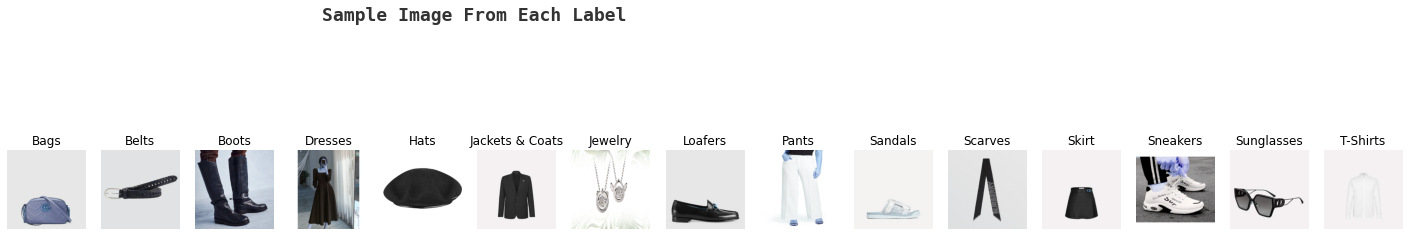

In [6]:
k=0
fig, ax = plt.subplots(1,len(labels),figsize=(25,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',y=0.62,x=0.3,alpha=0.8)
for i in labels:
    f=1
    while True :
        if y_train[f]==i:
            ax[k].imshow(X[f])
            ax[k].set_title(y_train[f])
            ax[k].axis('off')
            k+=1
            break
        f+=1

c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


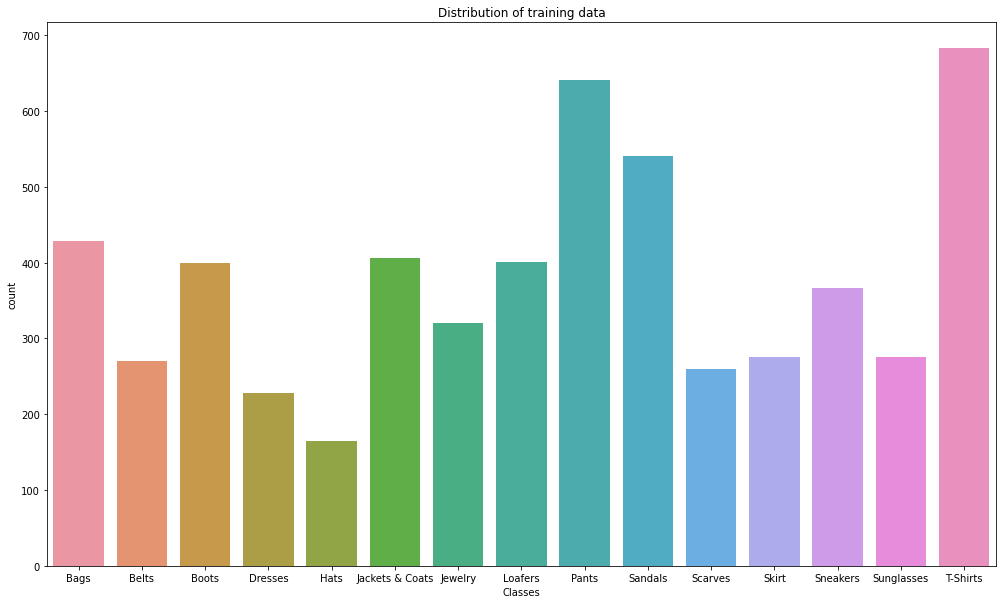

In [7]:
plt.figure(figsize=(17,10))
# Count plot for training set
sns.countplot(y_train.ravel())
plt.title('Distribution of training data')
plt.xlabel('Classes')
plt.show()


<div style='color: lightblue;
           background-color: black;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: dashed;
           border-color: lightblue;
           font-family: "Verdana";'>
Data Preprocessing
<a class="anchor" id="1"></a> 

### **Split Data**

In [8]:
# split data into Train, Validation and Test
x_train, x_test, y_train, y_test = train_test_split(X, y_train, train_size=0.8, random_state=42)

In [ ]:
X_train = x_train.astype('float32') #set x_train data type as float32
X_test = x_test.astype('float32') #set x_test data type as float32
X_train /= 255 #change x_train value between 0 - 1
X_test /= 255 #change x_test value between 0 - 1

In [76]:
encoder = OrdinalEncoder()

y_train_ml = encoder.fit_transform(y_train.reshape(-1,1))
y_test_ml = encoder.fit_transform(y_test.reshape(-1,1))

In [77]:
print(len(X_train))
print(len(X_test))

4526
1132


### **Feature Extraction**

In [78]:
x_train_hog = []
x_train_hog_img = []
for i in range(len(X_train)):
    fd , hog_im = hog(X_train[i] , orientations=9 , pixels_per_cell = (8,8),
                     cells_per_block = (2,2) , visualize = True ,  multichannel = True)
    x_train_hog.append(fd)
    x_train_hog_img.append(hog_im)
x_train_hog = np.array(x_train_hog)
x_test_hog = []
x_test_hog_img = []
for i in range(len(X_test)):
    fd , hog_im = hog(X_test[i] , orientations=9 , pixels_per_cell = (8,8),
                     cells_per_block = (2,2) , visualize = True ,  multichannel = True)
    x_test_hog.append(fd)
    x_test_hog_img.append(hog_im)
x_test_hog = np.array(x_test_hog)

### **Comparing x_train_hog and x train  image**

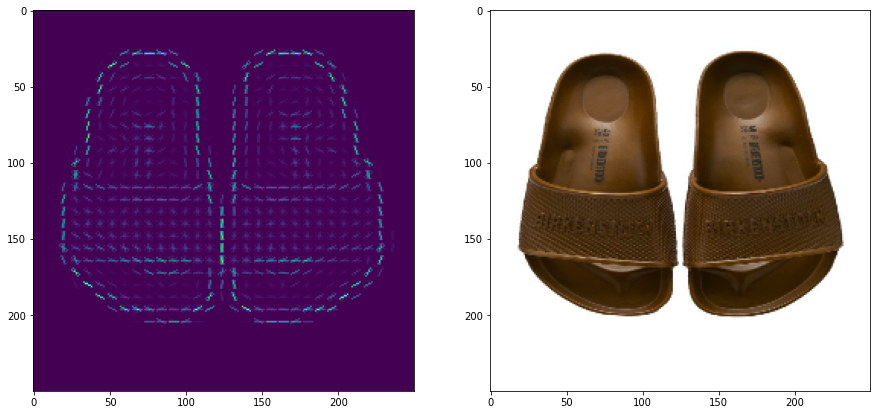

In [79]:
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
plt.imshow(x_train_hog_img[50])
plt.subplot(1,2,2)
plt.imshow(X_train[50])

plt.show()

<div style='color: lightblue;
           background-color: black;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: dashed;
           border-color: lightblue;
           font-family: "Verdana";'>
Modelling With Machine Learning
<a class="anchor" id="1"></a> 


### **Machine Learning**

In [80]:
x_train_ml = x_train.reshape(x_train.shape[0], -1)
x_test_ml = x_test.reshape(x_test.shape[0], -1)
# x_train_ml = x_train.flatten()
# x_test_ml = x_test.flatten()

### **Naive Bayes**

In [41]:
MNB = MultinomialNB()
MNB.fit(x_train_hog, y_train_ml)
predictions = MNB.predict(x_test_hog)
print(classification_report(y_test_ml, predictions, digits=6))

c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         0.0   0.682540  0.843137  0.754386       102
         1.0   0.857143  0.480000  0.615385        25
         2.0   0.923077  0.571429  0.705882        21
         3.0   0.714286  0.400000  0.512821        50
         4.0   0.500000  0.111111  0.181818        18
         5.0   0.555556  0.432099  0.486111        81
         6.0   0.512195  0.291667  0.371681        72
         7.0   0.900000  0.333333  0.486486        27
         8.0   0.736486  0.807407  0.770318       135
         9.0   0.454545  0.400000  0.425532        25
        10.0   0.642857  0.450000  0.529412        20
        11.0   0.346154  0.600000  0.439024        45
        12.0   0.545455  0.952381  0.693642        63
        13.0   0.972222  0.897436  0.933333        39
        14.0   0.683099  0.769841  0.723881       126

    accuracy                       0.640754       849
   macro avg   0.668374  0.555989  0.575314       849
weighted avg   0.658302  0

### **SVM**

In [81]:
SVM = svm.SVC(kernel='rbf')
SVM.fit(x_train_hog , y_train_ml)

c:\Users\NAJMA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [82]:
predictions = SVM.predict(x_test_hog)
print(classification_report(y_test_ml, predictions, digits=6))

              precision    recall  f1-score   support

         0.0   0.956044  0.878788  0.915789        99
         1.0   0.982759  0.982759  0.982759        58
         2.0   0.974684  0.916667  0.944785        84
         3.0   0.812500  0.764706  0.787879        51
         4.0   0.846154  0.647059  0.733333        34
         5.0   0.822785  0.783133  0.802469        83
         6.0   0.739726  0.885246  0.805970        61
         7.0   0.893939  0.776316  0.830986        76
         8.0   0.875969  0.926230  0.900398       122
         9.0   0.848739  0.935185  0.889868       108
        10.0   0.700000  0.893617  0.785047        47
        11.0   0.800000  0.734694  0.765957        49
        12.0   0.975904  0.941860  0.958580        86
        13.0   1.000000  0.912281  0.954128        57
        14.0   0.846774  0.897436  0.871369       117

    accuracy                       0.874558      1132
   macro avg   0.871732  0.858398  0.861955      1132
weighted avg   0.879607  0

### **XGboost**

In [ ]:
import xgboost
xgc = xgboost.XGBClassifier()
xgc.fit(x_train_hog, y_train_ml)#learning

In [ ]:
prdct = xgc.predict(x_test_hog)
print(classification_report(y_test_ml, prdct, digits=6))

### **Plot Random Sample to predict**

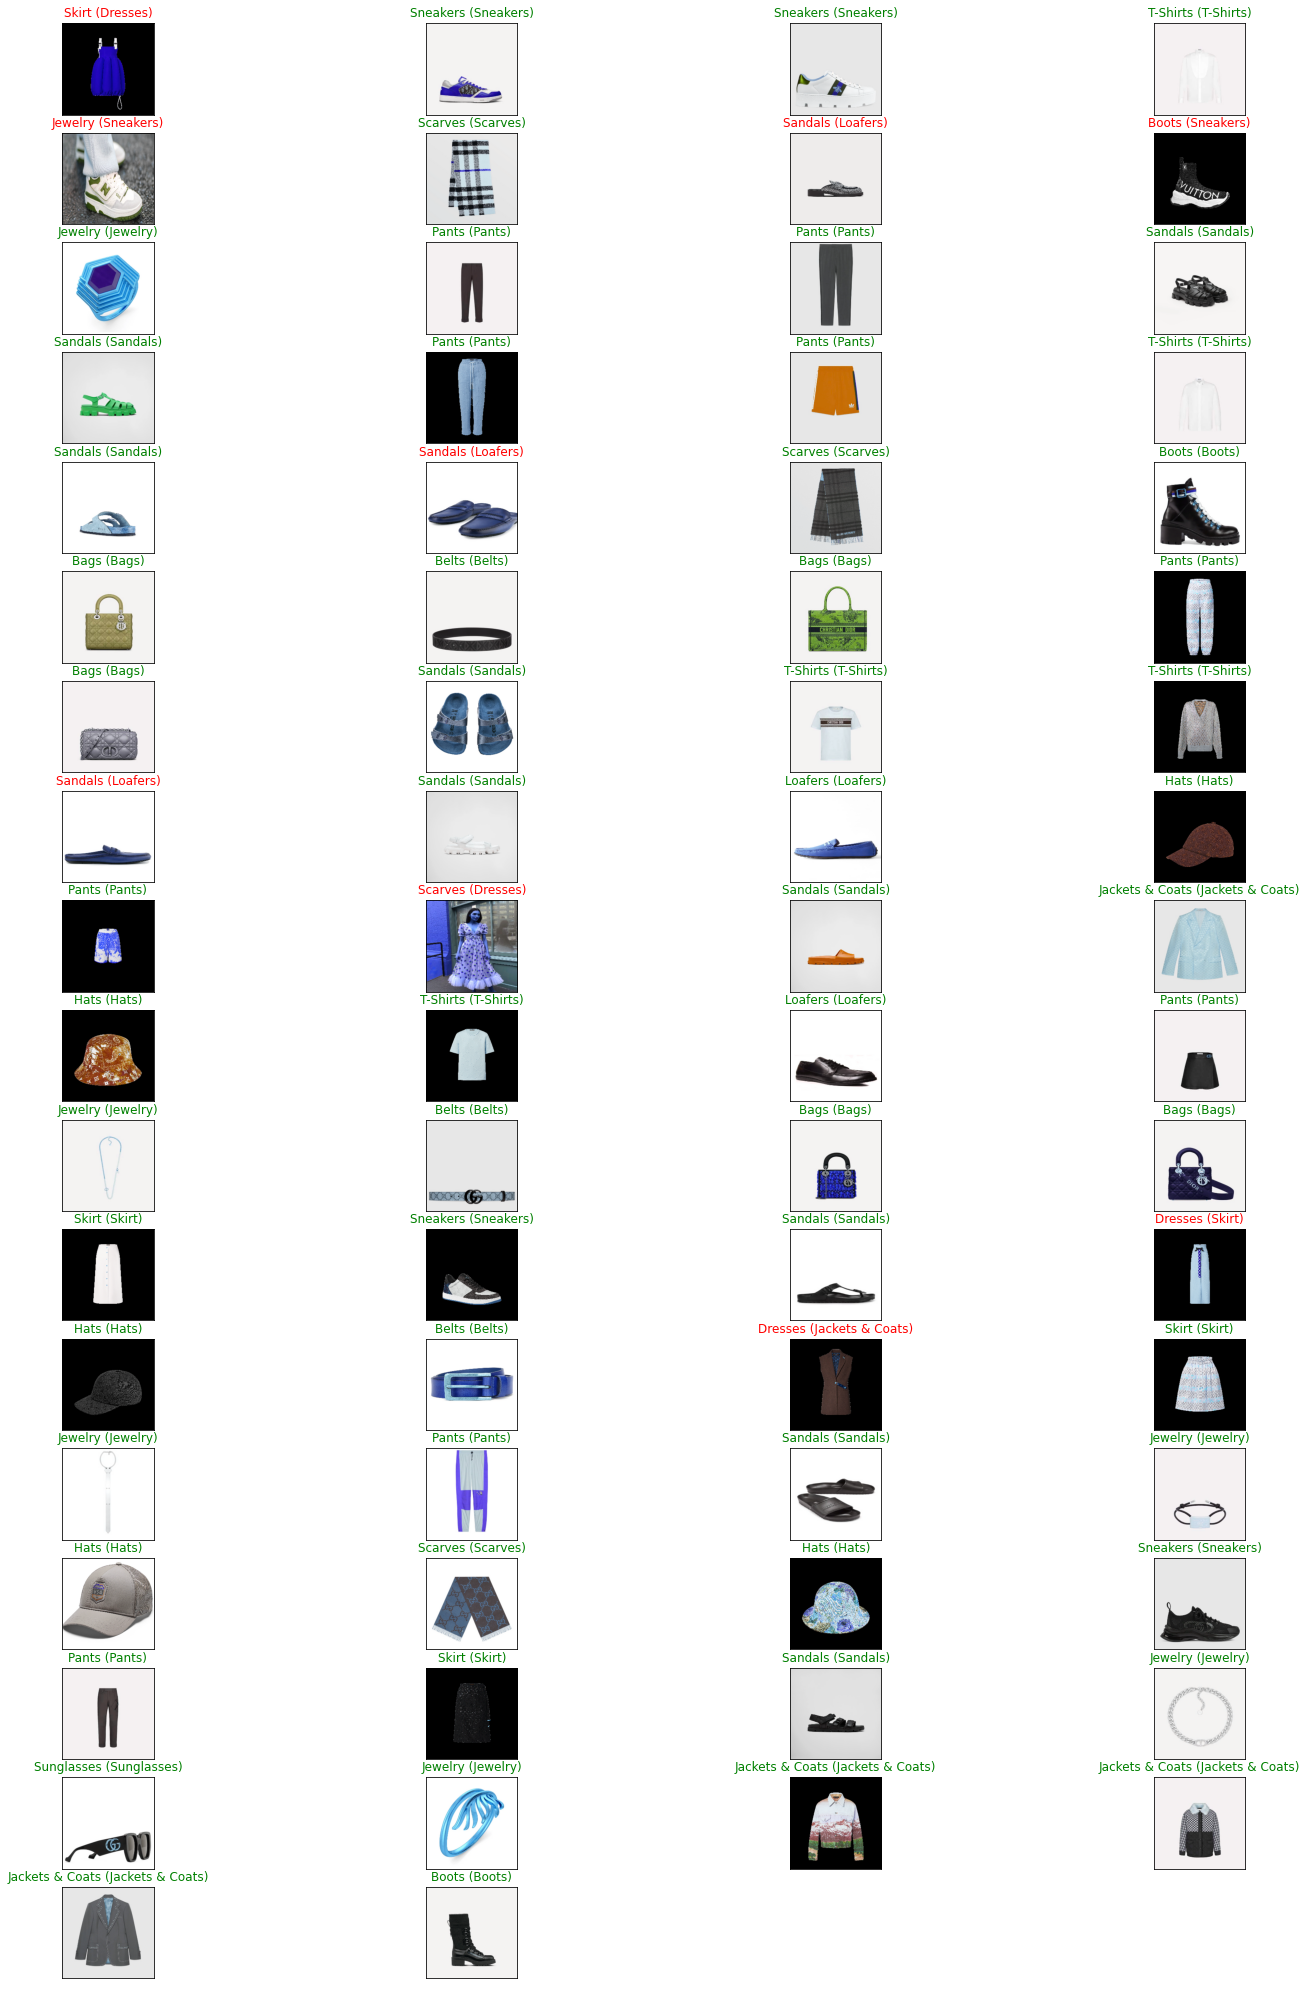

In [83]:
y_hat = SVM.predict(x_test_hog)
# Plot a random sample of 54 test images, their predicted labels and ground truth
figure = plt.figure(figsize= (25, 40))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=70, replace=False)): # size (jumlah total data uji)
    ax = figure.add_subplot(20, 4, i + 1, xticks=[], yticks=[]) #ukuran 10 X 7 untuk visualisasi gambar pada heatmap confusion matrix
    # Display each image
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = y_hat[index]
    true_index = y_test_ml[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[int(predict_index)], 
                                  labels[int(true_index)]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

In [ ]:
# load an image from file
image = load_img('T-shirt.jpg', target_size=(250, 250))
# convert the image pixels to a numpy array
image_pixels = img_to_array(image)
# reshape data for the model.
# image_reshape = image_pixels.reshape(image_pixels.shape[0], -1)

x_predict_hog = []
x_predict_hog_img = []
fd , hog_im = hog(image_pixels, orientations=9 , pixels_per_cell = (8,8),
                    cells_per_block = (2,2) , visualize = True ,  multichannel = True)
x_predict_hog.append(fd)
x_predict_hog_img.append(hog_im)
x_predict_hog = np.array(x_predict_hog)

yhat = SVM.predict(x_predict_hog)
result = labels[int(yhat[0])]
display(image)
print('Label :', result)